In [1]:
import pandas as pd

In [2]:
data_with_null = pd.read_csv("processes_datasets.csv")

In [3]:
data_with_null

,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,...,JobStructureParams,UsedNetwork,UsedLocalDiskSpace,UsedResources,ReqPlatform,ReqNetwork,ReqLocalDiskSpace,ReqResources,VOID,ProjectID
0,1,1136070024,203761,138467,1,138371,98652,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,1136070690,0,11,1,4,35848,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,3,1136071207,117,201203,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,4,1136071267,4406,196985,1,0,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,5,1136071269,202516,19520,1,18731,522268,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404171,404172,1167603618,2,56,1,18,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404172,404173,1167603624,1,57,1,17,61084,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404173,404174,1167603637,1,45,1,17,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
404174,404175,1167603747,1,43,1,17,0,1,259200,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [491]:
data_with_null.columns.shape

(29,)

#### columns 18-end has values of -1, and 11-17 has useless values

In [5]:
data = data_with_null.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].copy()

In [6]:
data

,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,Status
0,1,1136070024,203761,138467,1,138371,98652,1,259200,-1,1
1,2,1136070690,0,11,1,4,35848,1,259200,-1,1
2,3,1136071207,117,201203,1,0,0,1,259200,-1,1
3,4,1136071267,4406,196985,1,0,0,1,259200,-1,1
4,5,1136071269,202516,19520,1,18731,522268,1,259200,-1,1
...,...,...,...,...,...,...,...,...,...,...,...
404171,404172,1167603618,2,56,1,18,0,1,259200,-1,1
404172,404173,1167603624,1,57,1,17,61084,1,259200,-1,1
404173,404174,1167603637,1,45,1,17,0,1,259200,-1,1
404174,404175,1167603747,1,43,1,17,0,1,259200,-1,1


#### We should delete columns which have many -1 or null values
##### I used http://gwa.ewi.tudelft.nl/datasets/gwa-t-4-auvergrid/report/ to see what the values were

In [7]:
def return_percent(col, check):
    cnt = 0

    for i in range(0, len(data[col])):
        if data[col][i] == check:
            cnt += 1

    return (cnt, cnt/len(data[col]))

In [8]:
def return_percent_less_than(col, check):
    cnt = 0

    for i in range(0, len(data[col])):
        if data[col][i] < check:
            cnt += 1

    return (cnt, cnt/len(data[col]))

In [9]:
def change_value(col, to_change, change):
    
    for i in range(0, len(data[col])):
        if data[col][i] == to_change:
            data[col][i] = change

In [10]:
def change_value_less_than(col, check, change):
    
    for i in range(0, len(data[col])):
        if data[col][i] < check:
            data[col][i] = change

In [11]:
data.corr()

,JobID,SubmitTime,WaitTime,RunTime,NProcs,AverageCPUTimeUsed,Used Memory,ReqNProcs,ReqTime:,ReqMemory,Status
JobID,1.000000,0.995078,0.050502,0.061998,-0.211346,0.057560,0.080842,NaN,-0.107677,-0.153945,0.218357
SubmitTime,0.995078,1.000000,0.049792,0.055988,-0.217646,0.051565,0.078524,NaN,-0.116449,-0.138871,0.224416
WaitTime,0.050502,0.049792,1.000000,0.082618,-0.009370,0.094106,0.037051,NaN,0.001670,0.028085,0.010322
RunTime,0.061998,0.055988,0.082618,1.000000,0.225126,0.864234,0.419717,NaN,0.274379,-0.017943,-0.242107
NProcs,-0.211346,-0.217646,-0.009370,0.225126,1.000000,0.230745,0.306838,NaN,0.814846,0.124508,-0.934946
AverageCPUTimeUsed,0.057560,0.051565,0.094106,0.864234,0.230745,1.000000,0.447703,NaN,0.290692,-0.009307,-0.244891
Used Memory,0.080842,0.078524,0.037051,0.419717,0.306838,0.447703,1.000000,NaN,0.244945,0.175678,-0.248276
ReqNProcs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReqTime:,-0.107677,-0.116449,0.001670,0.274379,0.814846,0.290692,0.244945,NaN,1.000000,-0.008853,-0.790733
ReqMemory,-0.153945,-0.138871,0.028085,-0.017943,0.124508,-0.009307,0.175678,NaN,-0.008853,1.000000,-0.092151


In [12]:
return_percent('ReqMemory', 0), return_percent('ReqMemory', -1)

((0, 0.0), (368345, 0.9113480266022723))

#### I will be removing ReqMemory as it contains too many NULL values

In [13]:
return_percent('Used Memory', 0), return_percent('Used Memory', -1)

((73156, 0.1810003562804323), (56565, 0.13995140730770753))

#### Used memory has a high correlation, so -1 are changed to 0

In [14]:
return_percent('ReqTime: ', 0), return_percent('ReqTime: ', -1)

((0, 0.0), (56565, 0.13995140730770753))

#### ReqTime: also has a somewhat good correlation, so -1 are changed to 0

In [15]:
return_percent('ReqNProcs', 1)

(404176, 1.0)

#### The AuverGrid only has 1 processor, so both ReqNProcs, and NProcs are 1, so both are dropped

In [16]:
return_percent('NProcs', 0), return_percent('NProcs', -1), return_percent('NProcs', 1), return_percent('NProcs', 0) + return_percent('NProcs', 1)

((56565, 0.13995140730770753),
 (0, 0.0),
 (347611, 0.8600485926922925),
 (56565, 0.13995140730770753, 347611, 0.8600485926922925))

#### I will also be dropping JobID and Status as it does not serve us a purpose

In [17]:
data = data_with_null.iloc[:, [1, 2, 3, 5, 6, 8]].copy()

In [18]:
data

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [19]:
data.corr()

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
SubmitTime,1.000000,0.049792,0.055988,0.051565,0.078524,-0.116449
WaitTime,0.049792,1.000000,0.082618,0.094106,0.037051,0.001670
RunTime,0.055988,0.082618,1.000000,0.864234,0.419717,0.274379
AverageCPUTimeUsed,0.051565,0.094106,0.864234,1.000000,0.447703,0.290692
Used Memory,0.078524,0.037051,0.419717,0.447703,1.000000,0.244945
ReqTime:,-0.116449,0.001670,0.274379,0.290692,0.244945,1.000000


In [20]:
return_percent('ReqTime: ', 259200)

(251533, 0.622335319266854)

<AxesSubplot:>

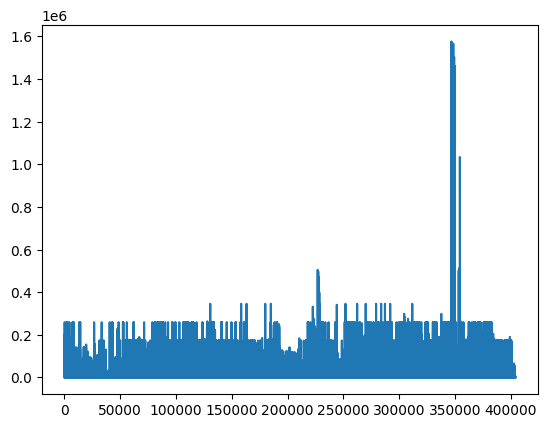

In [21]:
data['RunTime '].plot()

In [22]:
return_percent('ReqTime: ', -1)

(56565, 0.13995140730770753)

In [23]:
return_percent_less_than('ReqTime: ', 0)

(56565, 0.13995140730770753)

In [24]:
change_value('ReqTime: ', -1, 0)

### Values for ReqTime: have been adjusted

In [25]:
return_percent('ReqTime: ', -1)

(0, 0.0)

In [26]:
data

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [27]:
return_percent_less_than('Used Memory', 0), return_percent_less_than('WaitTime', 0)

((56565, 0.13995140730770753), (0, 0.0))

In [28]:
change_value_less_than('Used Memory', 0, 0)

### Values for Used Memory have been adjusted

In [29]:
change_value_less_than('WaitTime', 0, 0)

### Values for WaitTime have been adjusted

In [30]:
data.corr()

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
SubmitTime,1.000000,0.049792,0.055988,0.051565,0.078524,-0.116449
WaitTime,0.049792,1.000000,0.082618,0.094106,0.037051,0.001670
RunTime,0.055988,0.082618,1.000000,0.864234,0.419717,0.274379
AverageCPUTimeUsed,0.051565,0.094106,0.864234,1.000000,0.447703,0.290692
Used Memory,0.078524,0.037051,0.419717,0.447703,1.000000,0.244944
ReqTime:,-0.116449,0.001670,0.274379,0.290692,0.244944,1.000000


In [31]:
return_percent_less_than('SubmitTime', 0), return_percent_less_than('RunTime ', 0), return_percent_less_than('AverageCPUTimeUsed', 0)

((0, 0.0), (56565, 0.13995140730770753), (56565, 0.13995140730770753))

In [32]:
change_value_less_than('RunTime ', 0, 0), change_value_less_than('AverageCPUTimeUsed', 0, 0)

(None, None)

### All The values havd been adjusted, but perhaps I should've filled forward rather than making them all 0
#### Will be done in the next iteration

In [33]:
data

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,0,11,4,35848,259200
2,1136071207,117,201203,0,0,259200
3,1136071267,4406,196985,0,0,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,0,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,0,259200
404174,1167603747,1,43,17,0,259200


In [34]:
data.corr()

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
SubmitTime,1.000000,0.049792,0.055990,0.051567,0.078524,-0.116449
WaitTime,0.049792,1.000000,0.082618,0.094107,0.037051,0.001670
RunTime,0.055990,0.082618,1.000000,0.864233,0.419715,0.274372
AverageCPUTimeUsed,0.051567,0.094107,0.864233,1.000000,0.447701,0.290684
Used Memory,0.078524,0.037051,0.419715,0.447701,1.000000,0.244944
ReqTime:,-0.116449,0.001670,0.274372,0.290684,0.244944,1.000000


<AxesSubplot:>

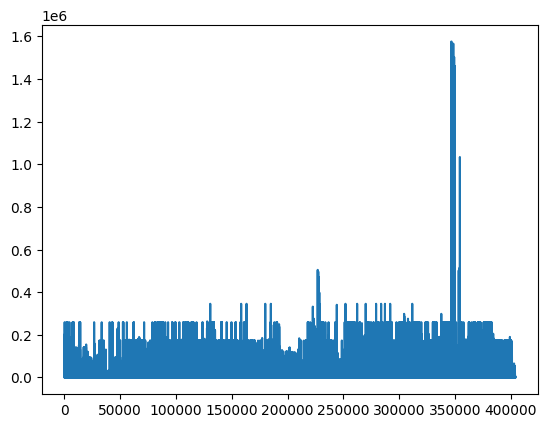

In [35]:
data["RunTime "].plot()

## RNN

In [36]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

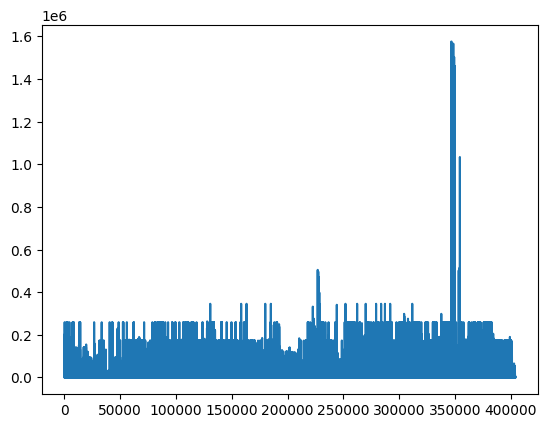

In [37]:
plt.plot(data["RunTime "])

In [38]:
returns = data["RunTime "].pct_change()

In [39]:
import numpy as np

In [40]:
column_names = data.columns
x = data.values  #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [41]:
pct_c_data = df

In [42]:
pct_c_data.columns = column_names

In [43]:
pct_c_data

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
0,0.000000,4.689126e-02,0.087870,0.533600,0.026898,0.75
1,0.000021,0.000000e+00,0.000007,0.000015,0.009774,0.75
2,0.000038,2.692506e-05,0.127682,0.000000,0.000000,0.75
3,0.000039,1.013947e-03,0.125005,0.000000,0.000000,0.75
4,0.000039,4.660475e-02,0.012387,0.072232,0.142398,0.75
...,...,...,...,...,...,...
404171,0.999931,4.602575e-07,0.000036,0.000069,0.000000,0.75
404172,0.999931,2.301287e-07,0.000036,0.000066,0.016655,0.75
404173,0.999932,2.301287e-07,0.000029,0.000066,0.000000,0.75
404174,0.999935,2.301287e-07,0.000027,0.000066,0.000000,0.75


## Univariate

In [44]:
returns

0                  NaN
1            -0.999921
2         18290.181818
3            -0.020964
4            -0.900906
              ...     
404171        0.365854
404172        0.017857
404173       -0.210526
404174       -0.044444
404175       -1.000000
Name: RunTime , Length: 404176, dtype: float64

In [45]:
def count_outside_range(arr, low, high):
    count = 0
    for i in range(0, len(arr)):
        if arr[i] > high or arr[i] < low:
            count = count + 1
    return count

In [46]:
count_outside_range(returns, -99999, 99999)

22391

In [47]:
def change_outside_range(arr, low, high):
    for i in range(0, len(arr)):
        if arr[i] > high or arr[i] < low:
            arr[i] = 0

In [48]:
change_outside_range(returns, -99999, 99999)

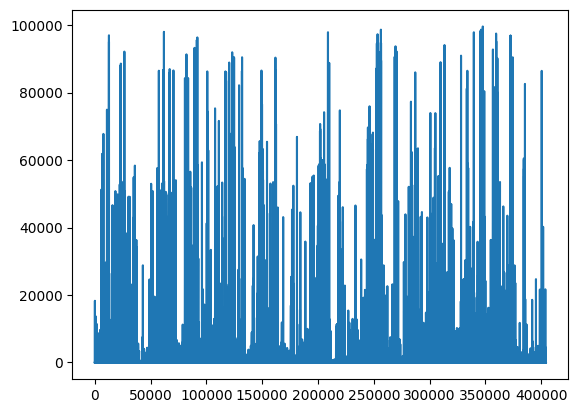

In [49]:
plt.plot(returns)

### We need to remove an inf value in the data

In [229]:
npa = returns.values[1:].reshape(-1,1)

In [230]:
npa.shape

(404175, 1)

In [231]:
# npa = npa[~np.isnan(npa)]

In [232]:
# npa = returns.values[1:].reshape(-1,1)

In [233]:
print(npa)

[[-9.99920559e-01]
 [ 1.82901818e+04]
 [-2.09639021e-02]
 ...
 [-2.10526316e-01]
 [-4.44444444e-02]
 [-1.00000000e+00]]


In [234]:
np.any(np.isnan(npa))

True

In [235]:
np.all(np.isfinite(df))

True

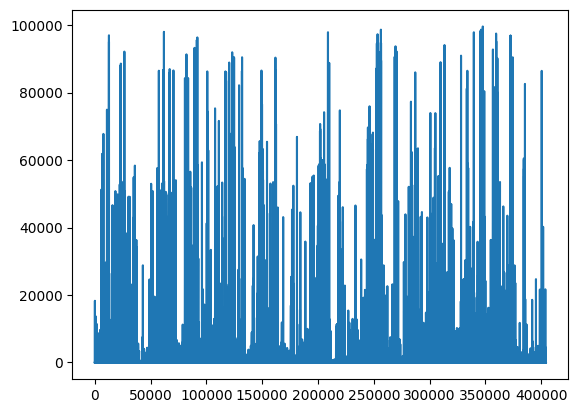

In [236]:
plt.plot(returns)

In [237]:
returns

0                  NaN
1            -0.999921
2         18290.181818
3            -0.020964
4            -0.900906
              ...     
404171        0.365854
404172        0.017857
404173       -0.210526
404174       -0.044444
404175       -1.000000
Name: RunTime , Length: 404176, dtype: float64

<AxesSubplot:>

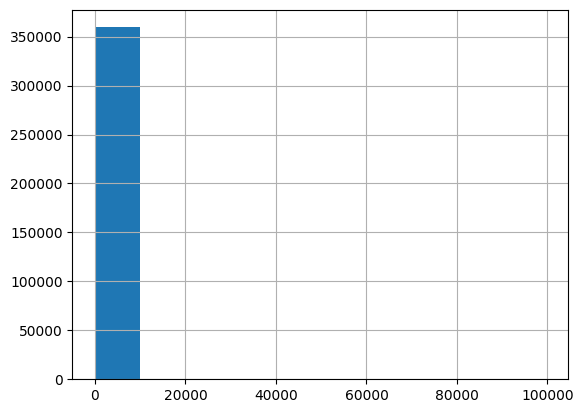

In [238]:
returns.hist()

In [239]:
len(npa)

404175

In [240]:
scale = MinMaxScaler(feature_range=(0,1))

In [241]:
npa = scale.fit_transform(npa)

In [267]:
npa

array([[7.97363354e-10],
       [1.83591105e-01],
       [9.82671984e-06],
       ...,
       [7.92405585e-06],
       [9.59104241e-06],
       [0.00000000e+00]])

In [268]:
samples = 10
steps = 1
X = []
Y = []

for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples])
    Y.append(npa[i+samples][0])
    
print("Testing data length is: ", len(X[0:1][0]), ': ', X[0:1])
print("Training data length is: ", len(Y[0:1]), ': ', Y[0:1])

Testing data length is:  10 :  [array([[7.97363354e-10],
       [1.83591105e-01],
       [9.82671984e-06],
       [9.94618485e-07],
       [2.36530902e-08],
       [4.58217143e-06],
       [9.45550919e-02],
       [1.00295778e-05],
       [1.00305368e-05],
       [1.00342414e-05]])]
Training data length is:  1 :  [9.554072059582297e-07]


In [269]:
X = np.array(X)
Y = np.array(Y)

print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

threshold = round(0.9 * X.shape[0])
print('Threshold is', threshold)

Dimensions of X (404165, 10, 1) Dimensions of Y (404165,)
Threshold is 363748


In [270]:
X

array([[[7.97363354e-10],
        [1.83591105e-01],
        [9.82671984e-06],
        ...,
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05]],

       [[1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        ...,
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07]],

       [[9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        ...,
        [1.00342414e-05],
        [9.55407206e-07],
        [1.12122924e-08]],

       ...,

       [[6.80852488e-04],
        [1.00322052e-05],
        [1.00420721e-05],
        ...,
        [1.00371374e-05],
        [1.37092609e-05],
        [1.02163720e-05]],

       [[1.00322052e-05],
        [1.00420721e-05],
        [2.71273984e-07],
        ...,
        [1.37092609e-05],
        [1.02163720e-05],
        [7.92405585e-06]],

       [[1.00420721e-05],
        [2.71273984e-07],
        [9.67215059e-06],
        ...,
        [1.02163720e-05],
        [7.9240

In [271]:
np.any(np.isnan(npa))

True

In [272]:
X[0], X[1]

(array([[7.97363354e-10],
        [1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05]]),
 array([[1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07]]))

## Building the architecture

In [481]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [482]:
import math
for i in range(1, 404165):
    for j in range(0, 10):
        if math.isnan(X[i][j][0]) or X[i][j][0] == 0:
            X[i][j][0] = X[i-1][j][0]

In [483]:
X[:100]

array([[[7.97363354e-10],
        [1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05]],

       [[1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07]],

       [[9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07],
        [1.12122924e-08]],

       [[9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07],
      

In [484]:
model = keras.Sequential()

In [485]:
model.add(layers.SimpleRNN(3, 
                          activation = 'tanh',
                          use_bias=True,
                          input_shape=(X.shape[1], X.shape[2])))

In [486]:
model.add(layers.Dropout(rate=0.2))

In [487]:
model.add(layers.Dense(1))

In [488]:
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(loss='categorical_crossentropy', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(clipvalue=0.5))

In [489]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ simple_rnn_32 (SimpleRNN)          │ (None, 3)                     │          15 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_32 (Dropout)               │ (None, 3)                     │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_32 (Dense)                   │ (None, 1)                     │           4 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [490]:
history = model.fit(X[8:10],
                    Y[8:10],
                    shuffle=False,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: nan - val_loss: nan
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - val_loss: nan
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - val_loss: nan
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - val_loss: nan
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan - val_loss: nan
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: nan - val_loss: nan
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - val_loss: nan
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: nan - val_loss: nan
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: nan - val_loss: nan
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: nan - val_loss: nan


In [479]:
X[8:15]

array([[[1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07],
        [1.12122924e-08],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.00342414e-05],
        [9.55407206e-07],
        [1.12122924e-08],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[9.55407206e-07],
        [1.12122924e-08],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.12122924e-08],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [1.00371374e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
      

In [444]:
X[:100]

array([[[7.97363354e-10],
        [1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05]],

       [[1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07]],

       [[9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07],
        [1.12122924e-08]],

       [[9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07],
      

In [430]:
X.shape

(404165, 10, 1)

In [431]:
X[0].shape

(10, 1)

In [170]:
X[1][0][0]

0.18359110527132208

In [171]:
0 == 0.0

True

In [179]:
X[8][9][0].dtype

dtype('float64')

In [183]:
X[8][9][0] = nan

NameError: name 'nan' is not defined

In [222]:
import math
math.isnan(X[9][9][0])

False

In [223]:
import math
for i in range(1, 404165):
    for j in range(0, 10):
        if math.isnan(X[i][j][0]):
            X[i][j][0] = X[i-1][j][0]

In [258]:
X[:10]

array([[[7.97363354e-10],
        [1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05]],

       [[1.83591105e-01],
        [9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07]],

       [[9.82671984e-06],
        [9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07],
        [1.12122924e-08]],

       [[9.94618485e-07],
        [2.36530902e-08],
        [4.58217143e-06],
        [9.45550919e-02],
        [1.00295778e-05],
        [1.00305368e-05],
        [1.00342414e-05],
        [9.55407206e-07],
      

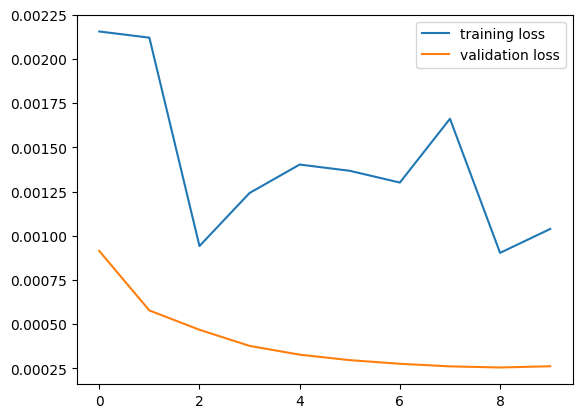

In [456]:
 plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

In [128]:
# pd.DataFrame(data).to_csv("process_data_new.csv", sep=',', index=False, encoding='utf-8')

In [79]:
# data.replace(to_replace=0, method='ffill')

,SubmitTime,WaitTime,RunTime,AverageCPUTimeUsed,Used Memory,ReqTime:
0,1136070024,203761,138467,138371,98652,259200
1,1136070690,203761,11,4,35848,259200
2,1136071207,117,201203,4,35848,259200
3,1136071267,4406,196985,4,35848,259200
4,1136071269,202516,19520,18731,522268,259200
...,...,...,...,...,...,...
404171,1167603618,2,56,18,65224,259200
404172,1167603624,1,57,17,61084,259200
404173,1167603637,1,45,17,61084,259200
404174,1167603747,1,43,17,61084,259200
